In [1]:
from config import set_project_root
set_project_root()

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
tickers = [
    'AAPL',  # Apple Inc. (Technology)
    'MSFT',  # Microsoft Corporation (Technology)
    'GOOGL', # Alphabet Inc. (Technology)
    'AMZN',  # Amazon.com Inc. (Consumer Discretionary)
    'TSLA',  # Tesla Inc. (Consumer Discretionary)
    'META',    # Meta Platforms Inc. (Communication Services)
    'NFLX',  # Netflix Inc. (Communication Services)
    'NVDA',  # NVIDIA Corporation (Technology)
    'JPM',   # JPMorgan Chase & Co. (Financials)
    'V',     # Visa Inc. (Financials)
    'MA',    # Mastercard Incorporated (Financials)
    'JNJ',   # Johnson & Johnson (Healthcare)
    'UNH',   # UnitedHealth Group Incorporated (Healthcare)
    'PFE',   # Pfizer Inc. (Healthcare)
    'MRK',   # Merck & Co., Inc. (Healthcare)
    'XOM',   # Exxon Mobil Corporation (Energy)
    'CVX',   # Chevron Corporation (Energy)
    'WMT',   # Walmart Inc. (Consumer Staples)
    'KO',    # The Coca-Cola Company (Consumer Staples)
    'PEP',   # PepsiCo Inc. (Consumer Staples)
    'T',     # AT&T Inc. (Telecommunications)
    'VZ',    # Verizon Communications Inc. (Telecommunications)
    'DIS',   # The Walt Disney Company (Communication Services)
    'NKE',   # Nike Inc. (Consumer Discretionary)
    'ADBE',  # Adobe Inc. (Technology)
    'INTC',  # Intel Corporation (Technology)
    'CSCO',  # Cisco Systems Inc. (Technology)
    'BA',    # Boeing Co. (Industrials)
    'CAT',   # Caterpillar Inc. (Industrials)
    'MMM',   # 3M Company (Industrials)
    'MDT',   # Medtronic plc (Healthcare)
    'LMT',   # Lockheed Martin Corporation (Aerospace & Defense)
    'TMO',   # Thermo Fisher Scientific Inc. (Healthcare)
    'AMGN',  # Amgen Inc. (Healthcare)
    'TXN',   # Texas Instruments Incorporated (Technology)
    'QCOM',  # Qualcomm Incorporated (Technology)
    'LRCX',  # Lam Research Corporation (Technology)
    'SBUX',  # Starbucks Corporation (Consumer Discretionary)
    'CHTR',  # Charter Communications Inc. (Communication Services)
    'SPGI',  # S&P Global Inc. (Financials)
    'NOW',   # ServiceNow Inc. (Technology)
    'ZM',    # Zoom Video Communications, Inc. (Communication Services)
    'VRTX',  # Vertex Pharmaceuticals Incorporated (Healthcare)
    'BIIB',  # Biogen Inc. (Healthcare)
    'GILD',  # Gilead Sciences Inc. (Healthcare)
    'NVS',   # Novartis AG (Healthcare)
    'AZN',   # AstraZeneca plc (Healthcare)
    'HSY',   # The Hershey Company (Consumer Staples)
    'MCD',   # McDonald's Corporation (Consumer Discretionary)
    'CPB',   # Campbell Soup Company (Consumer Staples)
    'AMAT',  # Applied Materials, Inc. (Technology)
    'KMB',   # Kimberly-Clark Corporation (Consumer Staples)
]

In [4]:
# Create initial dataframe

start = '2022-09-30'

df = yf.download(tickers,start)

df = df.stack().reset_index()

columns = {column: column.replace(' ', '_').lower() for column in df.columns}

df = df.rename(columns=columns)

df = df.sort_values(['ticker', 'date'])

df = df.reset_index(drop=True)

df

[*********************100%***********************]  52 of 52 completed
/var/folders/5k/s9c0d19s0k7byf19zlnzgmjr0000gn/T/ipykernel_8006/3730181472.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack().reset_index()


Price,date,ticker,adj_close,close,high,low,open,volume
0,2022-09-30 00:00:00+00:00,AAPL,136.535324,138.199997,143.100006,138.000000,141.279999,124925300
1,2022-10-03 00:00:00+00:00,AAPL,140.734131,142.449997,143.070007,137.690002,138.210007,114311700
2,2022-10-04 00:00:00+00:00,AAPL,144.340179,146.100006,146.220001,144.259995,145.029999,87830100
3,2022-10-05 00:00:00+00:00,AAPL,144.636536,146.399994,147.380005,143.009995,144.070007,79471000
4,2022-10-06 00:00:00+00:00,AAPL,143.678238,145.429993,147.539993,145.220001,145.809998,68402200
...,...,...,...,...,...,...,...,...
27815,2024-11-08 00:00:00+00:00,ZM,81.459999,81.459999,81.570000,80.209999,80.519997,2839800
27816,2024-11-11 00:00:00+00:00,ZM,85.580002,85.580002,86.230003,81.830002,81.870003,5447400
27817,2024-11-12 00:00:00+00:00,ZM,86.320000,86.320000,87.099998,84.070000,84.730003,3943000
27818,2024-11-13 00:00:00+00:00,ZM,85.040001,85.040001,87.144997,84.650002,86.510002,2729000


In [5]:
# Generate features

df['ret'] = df.groupby('ticker')['adj_close'].pct_change()
df['log_ret'] = np.log(1+df['ret'])

for t in [50,100,150]:
    df[f'ret_{t}'] = df.groupby('ticker')['log_ret'].rolling(t,t).sum().reset_index(drop=True)
    df[f'ret_{t}'] = df.groupby('ticker')[f'ret_{t}'].shift(1)

df = df.dropna().reset_index(drop=True)

df

Price,date,ticker,adj_close,close,high,low,open,volume,ret,log_ret,ret_50,ret_100,ret_150
0,2023-05-09 00:00:00+00:00,AAPL,170.242004,171.770004,173.539993,171.600006,173.050003,45326900,-0.009971,-0.010021,0.167720,0.184493,0.230659
1,2023-05-10 00:00:00+00:00,AAPL,172.016083,173.559998,174.029999,171.899994,173.020004,53724500,0.010421,0.010367,0.149485,0.167712,0.190348
2,2023-05-11 00:00:00+00:00,AAPL,172.204391,173.750000,174.589996,172.169998,173.850006,49514700,0.001095,0.001094,0.163306,0.193737,0.175415
3,2023-05-12 00:00:00+00:00,AAPL,171.271454,172.570007,174.059998,171.000000,173.619995,45497800,-0.005418,-0.005432,0.178748,0.242819,0.174458
4,2023-05-15 00:00:00+00:00,AAPL,170.775253,172.070007,173.210007,171.470001,173.160004,37266700,-0.002897,-0.002901,0.169195,0.252072,0.175673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19963,2024-11-08 00:00:00+00:00,ZM,81.459999,81.459999,81.570000,80.209999,80.519997,2839800,0.015837,0.015713,0.126095,0.342225,0.242217
19964,2024-11-11 00:00:00+00:00,ZM,85.580002,85.580002,86.230003,81.830002,81.870003,5447400,0.050577,0.049340,0.152474,0.371017,0.256819
19965,2024-11-12 00:00:00+00:00,ZM,86.320000,86.320000,87.099998,84.070000,84.730003,3943000,0.008647,0.008610,0.214186,0.383678,0.292915
19966,2024-11-13 00:00:00+00:00,ZM,85.040001,85.040001,87.144997,84.650002,86.510002,2729000,-0.014829,-0.014940,0.226422,0.382560,0.327385


In [6]:
pivot = df[['date', 'ticker', 'ret']]
pivot = pivot.pivot(index='date', columns='ticker', values='ret')
pivot = pivot.dropna(axis=1, how='any') # Get rid of stocks that are too young

columns = pivot.columns

scaler = StandardScaler()
scaled_pivot = scaler.fit_transform(pivot)
scaled_pivot = pd.DataFrame(columns=columns, data=scaled_pivot)

mse_matrix = pd.DataFrame(index=columns, columns=columns)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for a in columns:
    for b in columns:
        mse = compute_mse(scaled_pivot[a], scaled_pivot[b])
        mse_matrix.loc[a, b] = mse

mse_matrix = mse_matrix.astype(float)

mse_matrix.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CHTR,...,TMO,TSLA,TXN,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,1.412227,1.258853,1.733373,1.335901,1.706312,1.633273,1.636030,1.612505,1.802117,...,1.732182,1.310927,1.311053,2.035498,1.580889,1.630513,2.005605,1.857485,2.090485,1.552102
ADBE,1.412227,0.000000,1.331046,1.800186,1.099185,1.932421,1.842269,1.793264,1.673138,1.680219,...,1.693994,1.580971,1.462270,1.937593,1.372521,1.766728,2.116078,1.862180,2.115334,1.391906
AMAT,1.258853,1.331046,0.000000,1.766538,1.184278,1.978144,1.569442,1.679898,1.272639,1.802404,...,1.646024,1.288044,0.737925,2.072740,1.640384,1.804052,2.274632,2.012258,2.032976,1.593423
AMGN,1.733373,1.800186,1.766538,0.000000,1.757065,1.654044,1.845827,1.246927,1.566471,1.532924,...,1.412367,1.767823,1.611015,1.752760,1.680773,1.398218,1.740798,1.679663,1.828315,1.939893
AMZN,1.335901,1.099185,1.184278,1.757065,0.000000,1.959445,1.539791,1.818212,1.487121,1.841619,...,1.708640,1.366365,1.380773,2.091209,1.461351,1.756503,2.018714,1.663335,2.161917,1.479380


In [7]:
corr = pivot.corr()

corr.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CHTR,...,TMO,TSLA,TXN,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.293887,0.370573,0.133313,0.332049,0.146844,0.183363,0.181985,0.193748,0.098942,...,0.133909,0.344537,0.344473,-0.017749,0.209556,0.184744,-0.002803,0.071258,-0.045242,0.223949
ADBE,0.293887,1.000000,0.334477,0.099907,0.450408,0.033789,0.078866,0.103368,0.163431,0.159891,...,0.153003,0.209514,0.268865,0.031204,0.313739,0.116636,-0.058039,0.068910,-0.057667,0.304047
AMAT,0.370573,0.334477,1.000000,0.116731,0.407861,0.010928,0.215279,0.160051,0.363680,0.098798,...,0.176988,0.355978,0.631038,-0.036370,0.179808,0.097974,-0.137316,-0.006129,-0.016488,0.203289
AMGN,0.133313,0.099907,0.116731,1.000000,0.121468,0.172978,0.077087,0.376536,0.216764,0.233538,...,0.293817,0.116088,0.194493,0.123620,0.159613,0.300891,0.129601,0.160169,0.085842,0.030053
AMZN,0.332049,0.450408,0.407861,0.121468,1.000000,0.020278,0.230104,0.090894,0.256439,0.079190,...,0.145680,0.316817,0.309613,-0.045604,0.269324,0.121748,-0.009357,0.168332,-0.080959,0.260310


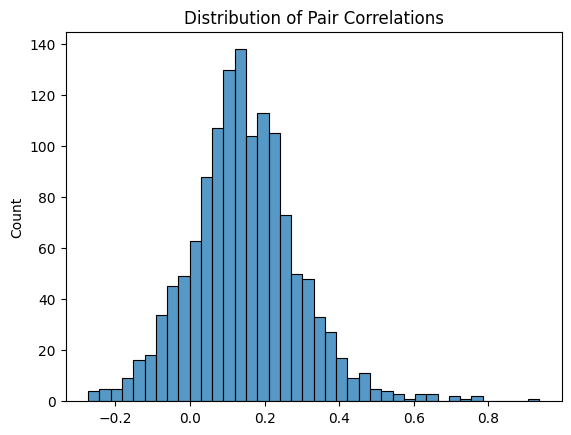

In [8]:
tri = np.triu(corr)

vals = tri[np.nonzero(tri)]
vals = vals[vals != 1]

sns.histplot(vals)
plt.title("Distribution of Pair Correlations")
plt.show()

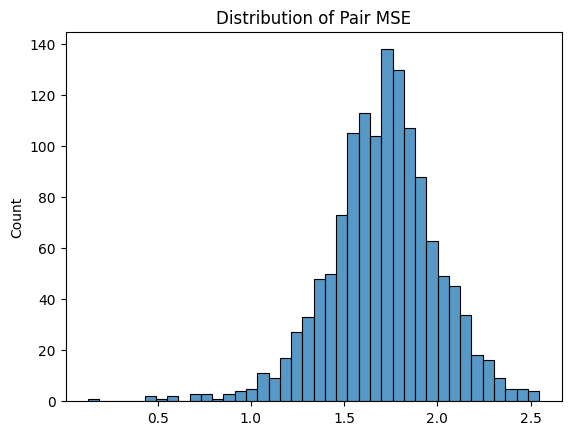

In [9]:
tri = np.triu(mse_matrix)

vals = tri[np.nonzero(tri)]
vals = vals[vals != 1]

sns.histplot(vals)
plt.title("Distribution of Pair MSE")
plt.show()

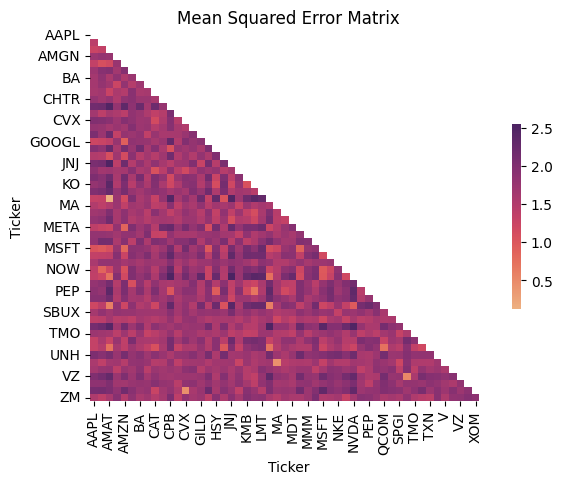

In [10]:
mask = np.triu(np.ones_like(mse_matrix, dtype=bool))

sns.heatmap(mse_matrix, mask=mask, cmap='flare', cbar_kws={"shrink": .5})
plt.title("Mean Squared Error Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

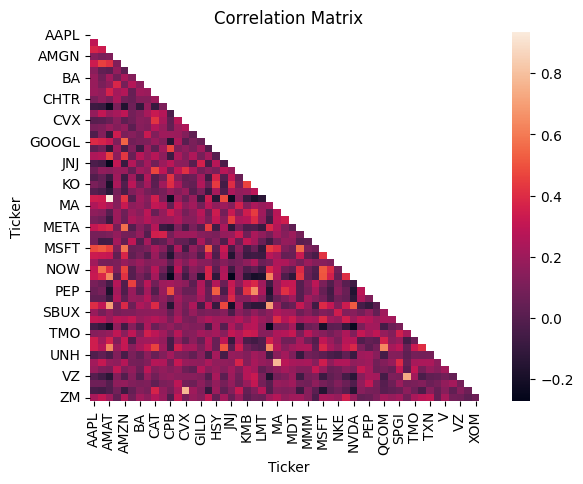

In [11]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask)
plt.title("Correlation Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

In [12]:
# Clustering
# The aggregate dataframe represents the last day of the df dataframe

aggregate = df.groupby('ticker').agg({'ret_50':'last', 'ret_100': 'last', 'ret_150': 'last'})

aggregate.head()

Price,ret_50,ret_100,ret_150
ticker,,,
AAPL,0.020249,0.080679,0.255231
ADBE,-0.077222,0.015767,0.094920
AMAT,0.002245,-0.227131,-0.149124
AMGN,-0.092459,-0.047013,0.124165
AMZN,0.211246,0.143011,0.124432


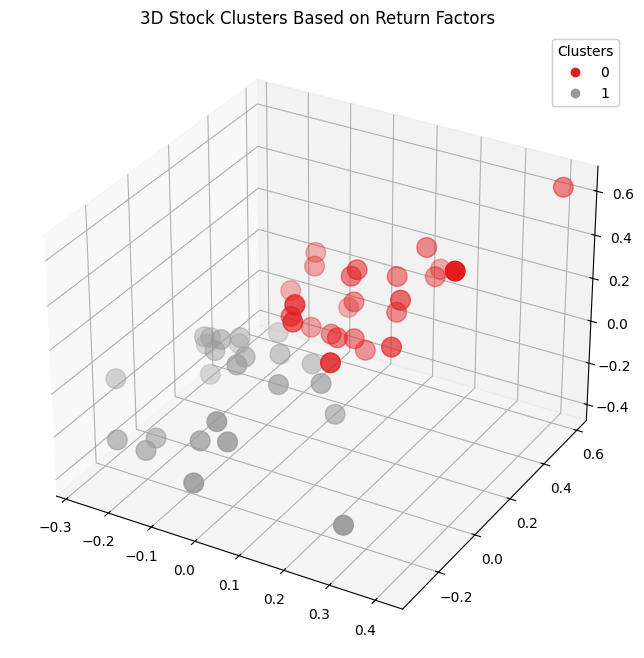

In [13]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregate)

n_clusters = 2 # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
aggregate['Cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregate['ret_50'], aggregate['ret_100'], aggregate['ret_150'], c=aggregate['Cluster'], s=200, cmap='Set1')

ax.set_title('3D Stock Clusters Based on Return Factors')
# ax.set_xlabel('50 Day Return')
# ax.set_ylabel('100 Day Return')
# ax.set_zlabel('150 Day Return')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()